## **1. Verilerimizi Yükliyoruz**

Verilerimizi yüklemek için ``tensorflow.keras.datasets`` içinden yerleşik veri kümeleri vardır. ```mnist.load_data()``` işlevini kullanıyoruz.

İade: **2 demet**
- x_train, x_test: sırasıyla channel_first veyachannels_last'ın image_data_format arka uç ayarına dayalı olarak şekle (num_samples, 3, 32, 32) veya (num_samples, 32, 32, 3) sahip RGB görüntü verilerinin uint8 dizisi.
- y_train, y_test: uint8 biçimli (num_samples, 1) kategori etiketleri dizisi (0-9 aralığındaki tamsayılar).

- https://keras.io/datasets/ adresindeki mevcut veriler hakkında daha fazla bilgi

In [ ]:
# Yerleşik veri setlerini bu fonksiyondan yükleyebiliriz
from tensorflow.keras.datasets import fashion_mnist
# MNIST eğitim ve test veri setini yükler
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Check to see if we're using the GPU
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 1131476264910853441
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14415560704
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17613668024317764191
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
# x_train, x_test, y_train, y_test içindeki örnek sayısını göster
print("Initial shape or dimensions of x_train", str(x_train.shape))

# Verilerimizdeki örnek sayısını yazdır
print ("Number of samples in our training data: " + str(len(x_train)))
print ("Number of labels in our training data: " + str(len(y_train)))
print ("Number of samples in our test data: " + str(len(x_test)))
print ("Number of labels in our test data: " + str(len(y_test)))

#Görüntü boyutlarını yazdırın ve no. Eğitim ve Test Verilerimizdeki etiket sayısı
print("\n")
print ("Dimensions of x_train:" + str(x_train[0].shape))
print ("Labels in x_train:" + str(y_train.shape))
print("\n")
print ("Dimensions of x_test:" + str(x_test[0].shape))
print ("Labels in y_test:" + str(y_test.shape))

Initial shape or dimensions of x_train (60000, 28, 28)
Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000


Dimensions of x_train:(28, 28)
Labels in x_train:(60000,)


Dimensions of x_test:(28, 28)
Labels in y_test:(10000,)


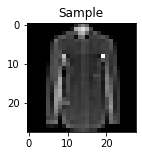

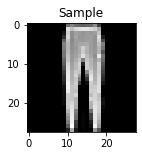

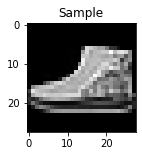

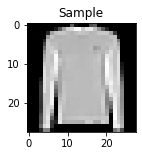

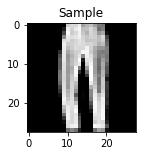

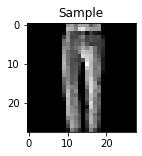

In [ ]:
# Using OpenCV
# import opencv and numpy
import cv2 
import numpy as np
from matplotlib import pyplot as plt

def imshow(title, image = None, size = 6):
    if image.any():
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize=(size * aspect_ratio,size))
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      plt.show()
    else:
      print("Image not found")
  

# Veri kümemizden 6 rastgele görüntü görüntülemek için OpenCV'yi kullanın
for i in range(0,6):
    random_num = np.random.randint(0, len(x_train))
    img = x_train[random_num]
    imshow("Sample", img, size = 2)

<Figure size 432x288 with 0 Axes>

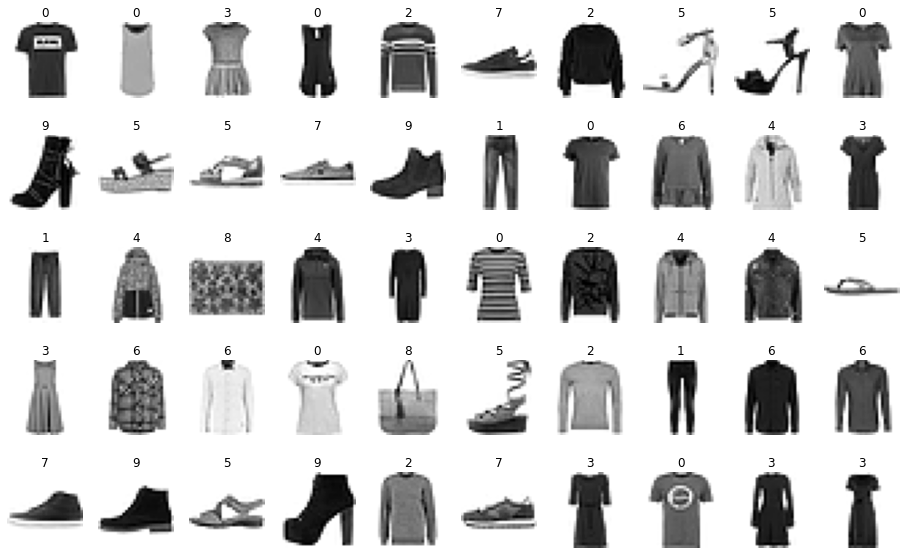

In [ ]:
#matplotlib kullanarak çizelim
# MNIST eğitim veri setinin ilk 50 görüntüsünü görelim
import matplotlib.pyplot as plt

# Şekil oluştur ve boyutunu değiştir
figure = plt.figure()
plt.figure(figsize=(16,10))

# Set how many images we wish to see
num_of_images = 50 

# iterate index from 1 to 51
for index in range(1, num_of_images + 1):
    plt.subplot(5, 10, index).set_title(f'{y_train[index]}')
    plt.axis('off')
    plt.imshow(x_train[index], cmap='gray_r')

In [ ]:
# Satır ve sütun sayısını saklayalım
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

# Verilerimizi Keras için gereken doğru 'şekle' sokmak
# Verilerimize 4. bir boyut eklememiz gerekiyor, böylece verilerimizi değiştiriyoruz.
# (60000,28,28) ile (60000,28,28,1) arasındaki orijinal görüntü şeklimiz
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

# tek bir görüntünün şeklini saklayın
input_shape = (img_rows, img_cols, 1)

# resim tipimizi float32 veri tipi olarak değiştirin
x_train = x_train.astype('float32') #uint8 originally
x_test = x_test.astype('float32')

# Aralığı (0 ila 255) ila (0 ila 1) değiştirerek verilerimizi normalleştirin
x_train /= 255.0
x_test /= 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [ ]:
print(img_rows,img_cols)

28 28


In [ ]:
from tensorflow.keras.utils import to_categorical

# Şimdi sıcak kodlama çıkışlarını birleştiririz
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Sıcak kodlanmış matrisimizdeki sayı sütunlarını sayalım
print ("Number of Classes: " + str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

Number of Classes: 10


In [ ]:
# Ham verilerimize bakın
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

# model oluştur
model = Sequential()

# İlk Evrişim Katmanımız, Katman boyutumuzu 26 x 26 x 32'ye düşüren Filtre boyutu 32
# ReLU aktivasyonunu kullanıyoruz ve 28 x 28 x 1 olan girdi_şeklimizi belirtiyoruz
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# İkinci Evrişim Katmanımız, Filtre boyutu 64, katman boyutumuzu 24 x 24 x 64'e düşürür
model.add(Conv2D(64, (3, 3), activation='relu'))

# Çekirdek boyutu 2 x 2 olan MaxPooling kullanıyoruz, bu bizim boyutumuzu 12 x 12 x 64'e düşürüyor
model.add(MaxPooling2D(pool_size=(2, 2)))

# Yoğun Katmanımıza girmeden önce tensör nesnemizi Düzleştiriyoruz
# Bir tensör üzerinde düzleştirme işlemi, tensörü şu şekle sahip olacak şekilde yeniden şekillendirir:
# tensörde bulunan eleman sayısına eşittir
# CNN'imizde 12 * 12 * 64'ten 9216 * 1'e çıkıyor
model.add(Flatten())

# Bu katmanı 1 * 128 boyutunda Fully Connected/Dense katmanına bağlıyoruz.
model.add(Dense(128, activation='relu'))

# Son Fully Connected/Dense katmanımızı her sınıf için bir çıktıyla oluşturuyoruz (10)
model.add(Dense(num_classes, activation='softmax'))

# Modelimizi derliyoruz, bu yeni oluşturduğumuz modeli saklayan bir nesne yaratıyor
# Optimizer'ımızı Stokastik Gradyan İnişi kullanacak şekilde ayarladık (öğrenme oranı 0,001)
# Çok sınıflı problemler için uygun olduğu için kayıp fonksiyonumuzu categorical_crossentropy olarak ayarladık
# Son olarak, metriklerin (performansımızı neye göre değerlendirdiğimiz) doğru olması
model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

# Model katmanlarımızı ve parametrelerimizi görüntülemek için özet işlevini kullanabiliriz
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
y_test.shape

(10000, 10)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = 'categorical_crossentropy',
              optimizer = SGD(0.001),
              metrics = ['accuracy'])

In [ ]:
batch_size = 128
epochs = 25

# Daha sonra çizmek için sonuçlarımızı burada saklayın
# Sığdırma işlevimizde veri kümelerimizi (x_train & y_train) belirtiriz,
# parti boyutu (RAM'inize bağlı olarak genellikle 16 ila 128),
# dönem (genellikle 10 ila 100) ve doğrulama veri kümelerimiz (x_test & y_test)
# ayrıntılı = 1, eğitimimizi her çağda performans metrikleri çıkaracak şekilde ayarlar
history = model.fit(x_train,
                    y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose = 1,
                    validation_data = (x_test, y_test))

# Evaute fonksiyonunu kullanarak doğruluk puanımızı alıyoruz
# Skor iki değer içerir, Test kaybımız ve Doğruluk
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/25
469/469 [==============================] - 13s 9ms/step - loss: 2.0603 - accuracy: 0.4371 - val_loss: 1.6653 - val_accuracy: 0.5818
Epoch 2/25
469/469 [==============================] - 4s 9ms/step - loss: 1.1934 - accuracy: 0.6407 - val_loss: 0.9258 - val_accuracy: 0.6742
Epoch 3/25
469/469 [==============================] - 4s 8ms/step - loss: 0.8214 - accuracy: 0.7107 - val_loss: 0.7777 - val_accuracy: 0.7104
Epoch 4/25
469/469 [==============================] - 4s 9ms/step - loss: 0.7236 - accuracy: 0.7399 - val_loss: 0.7149 - val_accuracy: 0.7408
Epoch 5/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6727 - accuracy: 0.7586 - val_loss: 0.6747 - val_accuracy: 0.7514
Epoch 6/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6382 - accuracy: 0.7729 - val_loss: 0.6524 - val_accuracy: 0.7615
Epoch 7/25
469/469 [==============================] - 4s 9ms/step - loss: 0.6130 - accuracy: 0.7825 - val_loss: 0.6269 - val_accuracy: 0.7720
Epoch

In [ ]:
history_dict = history.history
history_dict


{'loss': [2.060288906097412,
  1.1933640241622925,
  0.8213567733764648,
  0.7236073017120361,
  0.6726561188697815,
  0.6382432579994202,
  0.6130189299583435,
  0.5934927463531494,
  0.5779324173927307,
  0.5639622211456299,
  0.5520628094673157,
  0.5418665409088135,
  0.531373918056488,
  0.5243266224861145,
  0.5152682662010193,
  0.5082130432128906,
  0.5036063194274902,
  0.4968150854110718,
  0.49151983857154846,
  0.4850345849990845,
  0.4820845127105713,
  0.477832168340683,
  0.4714103639125824,
  0.46824902296066284,
  0.464964359998703],
 'accuracy': [0.4371166527271271,
  0.6407166719436646,
  0.7106666564941406,
  0.739883303642273,
  0.7585999965667725,
  0.7729166746139526,
  0.7824666500091553,
  0.7890833616256714,
  0.79503333568573,
  0.800166666507721,
  0.8042666912078857,
  0.8083833456039429,
  0.8121833205223083,
  0.8152666687965393,
  0.8185166716575623,
  0.8209666609764099,
  0.8213000297546387,
  0.8235999941825867,
  0.8265166878700256,
  0.8299166560173

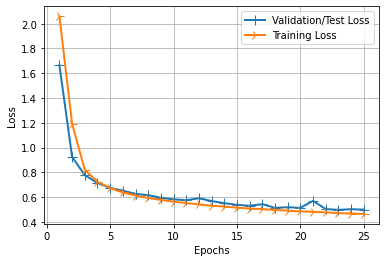

In [ ]:
# Kayıp tablolarımızı çizmek
import matplotlib.pyplot as plt

# Kayıtlı performans sonuçlarımızı almak için oluşturduğumuz Geçmiş nesnesini kullanın
history_dict = history.history

# Kayıp ve doğrulama kayıplarını çıkarın
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Çağ sayısını alın ve range() kullanarak bu sayıya kadar bir dizi oluşturun
epochs = range(1, len(loss_values) + 1)

# Hem Doğrulama hem de Eğitim Kaybı için çizgi çizelgeleri çizin
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

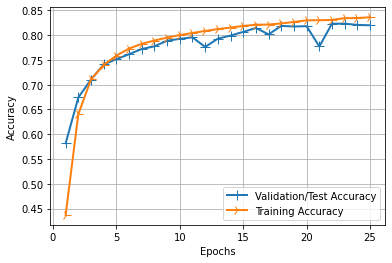

In [ ]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = history.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
model.save("mnist_simple_cnn_10_Epochs.h5")
print("Model Saved")

Model Saved


In [ ]:
# We need to import our load_model function 
from tensorflow.keras.models import load_model

classifier = load_model('mnist_simple_cnn_10_Epochs.h5')

In [ ]:
#x_test = x_test.reshape(10000,28,28,1) 
print(x_test.shape)

print("Predicting classes for all 10,000 test images...")

pred = np.argmax(classifier.predict(x_test), axis=-1)
print("Completed.\n")

print(pred)
print(type(pred))
print(len(pred))

(10000, 28, 28, 1)
Predicting classes for all 10,000 test images...
313/313 [==============================] - 1s 2ms/step
Completed.

[9 2 1 ... 8 1 5]
<class 'numpy.ndarray'>
10000


In [ ]:
# x_test'in 0. indeksine göre ilk görüntüyü alın ve şeklini gösterin
input_im = x_test[0]
print(input_im.shape)

# Birinci eksene 4. bir boyut eklememiz gerekiyor
input_im = input_im.reshape(1,28,28,1) 
print(input_im.shape)

# Artık o tek görüntü için tahminleri alıyoruz
pred = np.argmax(classifier.predict(input_im), axis=-1)
print(pred)
print(type(pred))
print(len(pred))

(28, 28, 1)
(1, 28, 28, 1)
1/1 [==============================] - 0s 56ms/step
[9]
<class 'numpy.ndarray'>
1


1/1 [==============================] - 0s 57ms/step


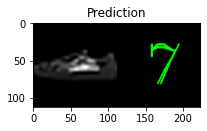

1/1 [==============================] - 0s 14ms/step


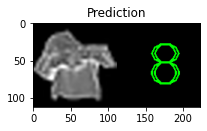

1/1 [==============================] - 0s 14ms/step


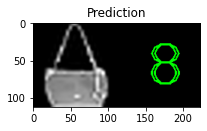

1/1 [==============================] - 0s 15ms/step


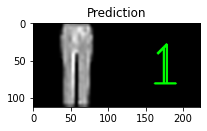

1/1 [==============================] - 0s 14ms/step


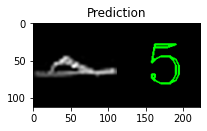

1/1 [==============================] - 0s 17ms/step


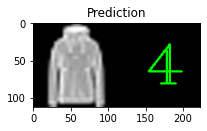

1/1 [==============================] - 0s 17ms/step


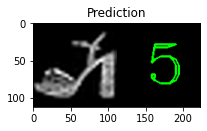

1/1 [==============================] - 0s 18ms/step


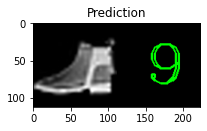

1/1 [==============================] - 0s 18ms/step


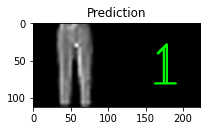

1/1 [==============================] - 0s 17ms/step


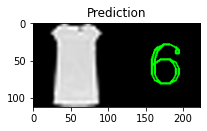

In [ ]:
import cv2
import numpy as np

# Yeniden ölçeklendirdiğimiz için verilerimizi yeniden yükleyin
(x_train, y_train), (x_test, y_test)  = fashion_mnist.load_data()

def draw_test(name, pred, input_im):  
    '''Function that places the predicted class next to the original image'''
    # Siyah arka planımızı oluştur
    BLACK = [0,0,0]
    # Öngörülen sınıf metnimizi yerleştirmek için alan oluşturmak üzere orijinal resmimizi sağa doğru genişlettik
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    # gri tonlamalı resmimizi renge dönüştür
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    # Öngörülen sınıf metnimizi genişletilmiş görüntümüze yerleştirin
    cv2.putText(expanded_image, str(pred), (150, 80) , cv2.FONT_HERSHEY_COMPLEX_SMALL, 4, (0,255,0), 2)
    imshow(name, expanded_image)

for i in range(0,10):
    # Test veri kümemizden rastgele bir veri görüntüsü alın 
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    # Metnimizi tutmak ve daha büyük bir ekrana izin vermek için daha büyük, yeniden boyutlandırılmış bir resim oluşturun
    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    # Verilerimizi ağımıza girebilmemiz (iletebilmemiz) için yeniden şekillendirin
    input_im = input_im.reshape(1,28,28,1) 
    
    # Tahmini Alın, bir dizi olarak depolandığından, numpy dizisindeki değere erişmek için [0] kullanın
    res = str(np.argmax(classifier.predict(input_im), axis=-1)[0])

    # Test veri örneğimizin resminin üzerine etiketi koyun
    draw_test("Prediction", res,  np.uint8(imageL)) 

Etiketler
Her eğitim ve test örneği, aşağıdaki etiketlerden birine atanır:

Etiket	Açıklama

0	tişört/üst

1	pantolon

2	kazak

3	Elbise

4	Kaplamak

5	Sandalet

6	Gömlek

7	Spor ayakkabı

8	Çanta

9	Bilek boyu bot